# P2: Advanced Lane Finding
## Import Packages

In [2]:
# importing packages necessary 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

## Process

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Supporting Functions

In [50]:
def calibrate(calibration_dir, nx, ny):
    # calibrates a camera using a directory of calibration images
    # requires the number of x- and y- inner corners within the calibration checkerboard
    # returns the associated pairs of object point and image point arrays    
    objpoints, imgpoints = [], [] 
    
    # populate the objpoints array
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
        
    # calibrate using each image in our calibration folder
    cal_paths = os.listdir(calibration_dir)
    for cal_path in cal_paths:
        cal = mpimg.imread(calibration_dir+cal_path)

        # detect the corners from within the image
        gray = cv2.cvtColor(cal, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret == True:
            # append the corner locations to our array
            imgpoints.append(corners)
            objpoints.append(objp)
            
    return objpoints, imgpoints

## Display Test Images

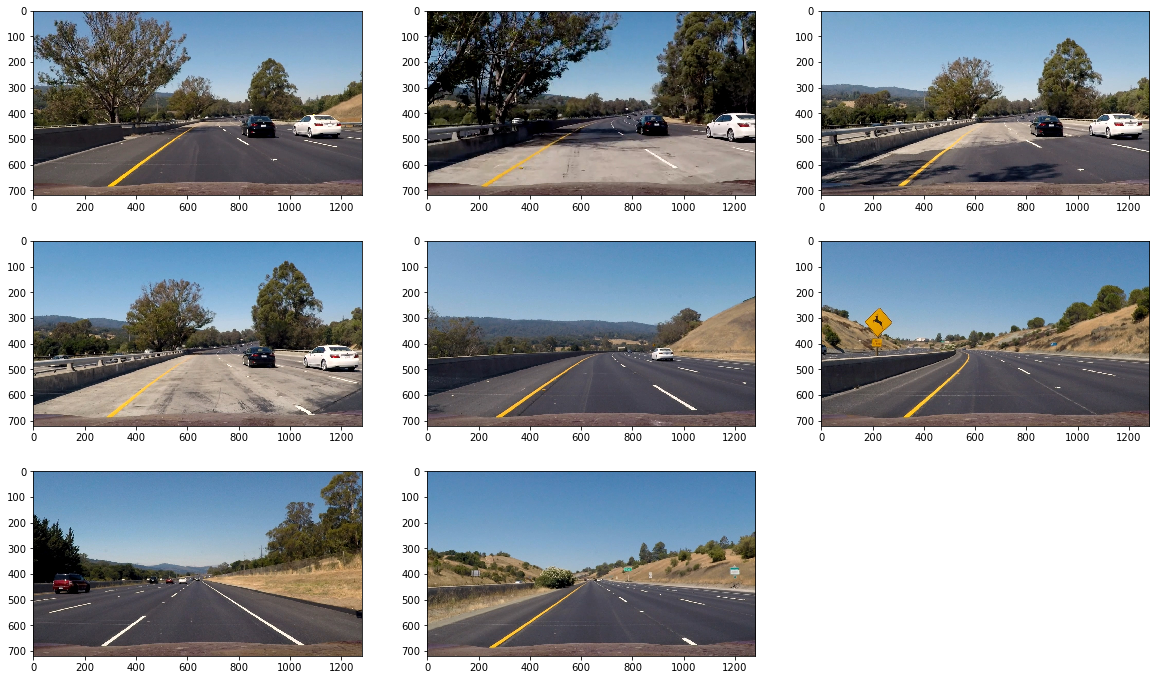

In [22]:
# display the entire directory of test images for reference
img_paths = os.listdir('test_images/')
plt.figure(figsize=(20,12))
cols, idx = 3, 0
for img_path in img_paths:
    img = mpimg.imread('test_images/'+img_path)
    plt.subplot(len(img_paths)/cols + 1, cols, idx+1)
    plt.imshow(img)
    idx += 1

## Compute Calibration and Undistort Image

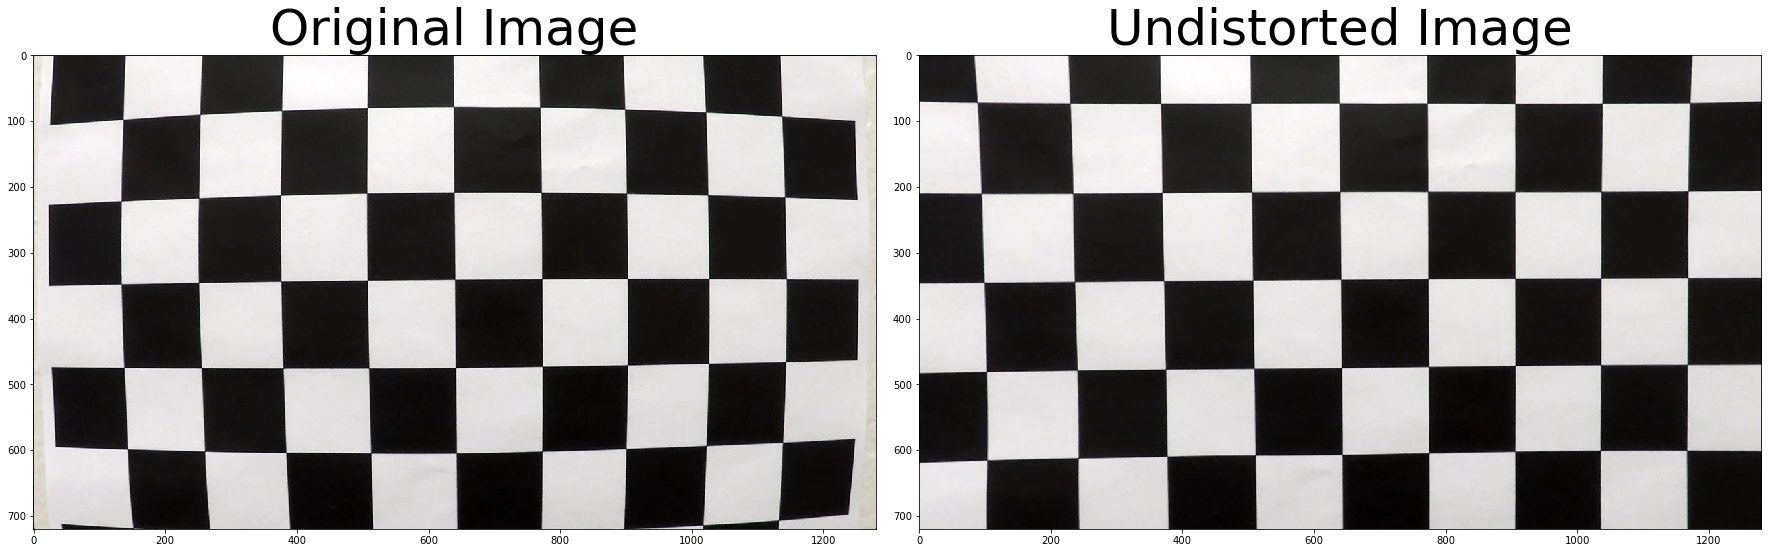

In [52]:
# identify the image to undistort
img = mpimg.imread('camera_cal/calibration1.jpg')

# grab the calibration arrays using the source directory
# we expect the checkerboard to have 9 x- and 6 y- inner corners
objpoints, imgpoints = calibrate('camera_cal/', 9, 6)

# obtain the calibration coefficents using the point arrays
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)

# undistort the image
undist = cv2.undistort(img, mtx, dist, None, mtx)

# display the undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Color and Gradient Thresholding